IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [2]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

- <b>Primero:<b> abrimos las rutas de los archivos a trabajar

In [4]:
GameItem = pd.read_csv("data/bgg_GameItem.csv")
ArtistasDiseñadores = pd.read_csv("Data/bgg_Person.csv")
Mecanicas = pd.read_csv("Data/bgg_Mechanic.csv")
Categoria = pd.read_csv("Data/bgg_Category.csv")
Tipo = pd.read_csv("Data/bgg_GameType.csv")
Familia = pd.read_csv("Data/bgg_GameFamily.csv")
Editorial = pd.read_csv("Data/bgg_Publisher.csv")

<b> - Luego con el comando .map sobreescribimos las columnas que necesitamos. <b>

In [5]:
GameItem["game_type"] = GameItem["bgg_id"].map(Tipo.set_index("bgg_id")["name"])

In [6]:
GameItem["family"] = GameItem["bgg_id"].map(Familia.set_index("bgg_id")["name"])

In [7]:
GameItem["publisher"] = GameItem["bgg_id"].map(Editorial.set_index("bgg_id")["name"])

In [8]:
GameItem["designer"] = GameItem["bgg_id"].map(ArtistasDiseñadores.set_index("bgg_id")["name"])
GameItem["artist"] = GameItem["bgg_id"].map(ArtistasDiseñadores.set_index("bgg_id")["name"])

In [9]:
GameItem["mechanic"] = GameItem["bgg_id"].map(Mecanicas.set_index("bgg_id")["name"])

In [10]:
GameItem["category"] = GameItem["bgg_id"].map(Categoria.set_index("bgg_id")["name"])

<b> - Por ultimo con el .head generamos el dataframe. <b>

In [11]:
GameItem.head()

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,NaN,Karl-Heinz Schmiel,Karl-Heinz Schmiel,NaN,3.0,5.0,4.0,...,1.57510,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,NaN,Reiner Knizia,Reiner Knizia,Moskito Spiele,3.0,4.0,3.0,...,1.46752,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,NaN,(Uncredited),(Uncredited),Rio Grande Games,2.0,4.0,2.0,...,1.19279,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,NaN,Sid Sackson,Sid Sackson,(Self-Published),2.0,4.0,2.0,...,1.23667,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,NaN,Jean du Poël,Jean du Poël,The Avalon Hill Game Co,2.0,6.0,3.0,...,1.33603,7.12541,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN


<b> - Con el .to_csv lo guardamos como archivo .csv <b>

In [12]:
GameItem.to_csv("Data/DataFrame_GameItem.csv", index=False)

**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



- El dataframe final tiene un tamaño de 13.603 KB, que es menor a todos los archivos sumados que suman un total de 17.593 KB. A mi parecer esto se debe a que todo esta más comprimido y más estructurado. 

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [ ]:
DataFrame = pd.read_csv("Data/DataFrame_GameItem.csv", dtype={3: str, 4: str, 5: str, 6: str, 17: str, 18: str, 22: str}) 
#Al ejecutar el codigo sin el dtype nos muestra una advertencia sobre que ciertas columnas que tienen una mezcla de tipos de datos, con este los transformo a str
DataFrame = DataFrame.dropna(subset=["year"]) #con el comando .dropna borro todos las filas que tengan NaN
DataFrame["year"] = DataFrame["year"].astype(int) #con .astype convierto los float a int

In [ ]:
dataframe_años = dataframe_años[(dataframe_años["year"] >= 0) & (dataframe_años["year"] <= 2025)] #defino un rango razonable desde el año 0 hasta el 2025
dataframe_años = dataframe_años.sort_values(by="year", ascending=True)

In [53]:
dataframe_años["year"].min()

np.int64(1964)

In [47]:
dataframe_años["year"].max()

np.int64(2025)

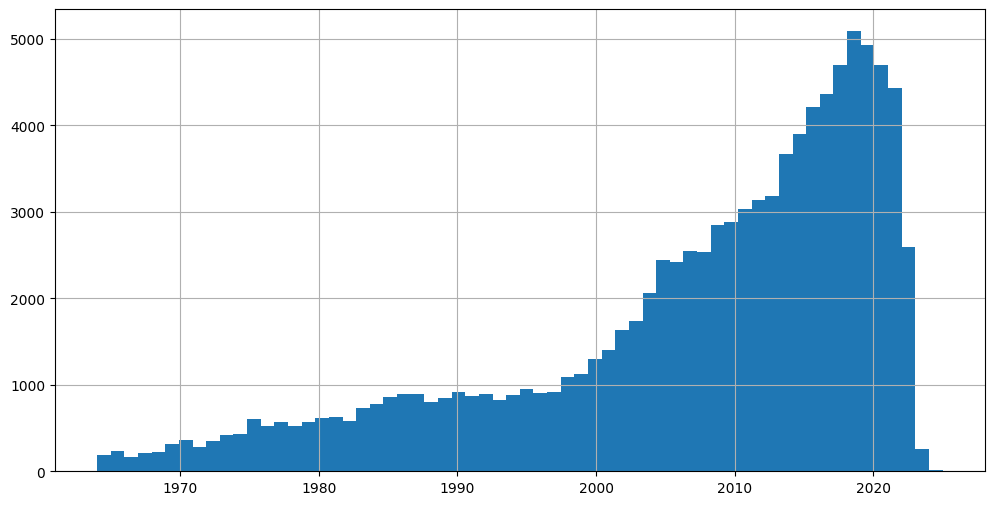

In [63]:
dataframe_años["year"].hist(bins=len(dataframe_años["year"].unique()), figsize=(12,6))
plt.show()

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?